In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
home_prices_df = pd.read_csv("Metro_US_All_Home_Prices.csv")
print(home_prices_df.head())

# Create a new column "Metro City" by extracting the city name from "Region Name"
# We split the string in "Region Name" at the comma and take the first part (city)
home_prices_df["Metro City"] = home_prices_df["RegionName"].str.split(',').str[0]

# Display the updated DataFrame to verify the new "Metro City" column
home_prices_df.head()

   RegionID  SizeRank       RegionName RegionType StateName     2000-01-31  \
0    102001         0    United States    country       NaN  122710.838539   
1    394913         1     New York, NY        msa        NY  218233.216724   
2    753899         2  Los Angeles, CA        msa        CA  222104.914025   
3    394463         3      Chicago, IL        msa        IL  153956.315498   
4    394514         4       Dallas, TX        msa        TX  126111.301852   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  122926.726242  123194.458782  123768.692526  124429.566719  ...   
1  219160.584763  220096.541902  221993.153236  223957.159952  ...   
2  222931.426109  224032.332323  226222.765868  228618.413461  ...   
3  154098.834197  154370.263570  155045.512395  155857.755512  ...   
4  126167.472266  126232.045908  126399.736872  126620.832817  ...   

      2023-11-30     2023-12-31     2024-01-31     2024-02-29     2024-03-31  \
0  353806.242676  354242.71700

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,Metro City
0,102001,0,United States,country,NaN,122710.838539,122926.726242,123194.458782,123768.692526,124429.566719,...,354242.717001,354677.065211,355473.042348,357021.050068,358884.957514,360324.712897,360888.668935,361037.327498,361281.717048,United States
1,394913,1,"New York, NY",msa,NY,218233.216724,219160.584763,220096.541902,221993.153236,223957.159952,...,639265.650987,642178.317205,646255.694516,651704.395720,657863.854229,662561.428749,665667.764258,668437.168324,672210.970325,New York
2,753899,2,"Los Angeles, CA",msa,CA,222104.914025,222931.426109,224032.332323,226222.765868,228618.413461,...,926554.539271,926708.887683,923740.986284,922618.466845,926105.996730,932034.718291,936012.934083,940417.087163,945635.978294,Los Angeles
3,394463,3,"Chicago, IL",msa,IL,153956.315498,154098.834197,154370.263570,155045.512395,155857.755512,...,311913.816691,312578.140750,313972.158826,316395.381263,319279.856054,321409.733463,322638.674660,323378.146509,324304.487366,Chicago
4,394514,4,"Dallas, TX",msa,TX,126111.301852,126167.472266,126232.045908,126399.736872,126620.832817,...,372112.028509,372133.731174,372616.126553,373774.335129,374743.310085,374887.158218,374222.635105,373283.837228,372632.458458,Dallas


In [5]:
commute_df = pd.read_csv("Commute_Time_By_Top_25_Metro_Area_All_Years__Three Buckets_Percentage.csv")
print(commute_df.head())

# Drop rows in the home_prices_df where "Metro City" doesn't match with any city in "Metro" column of commute_df
filtered_home_prices_df = home_prices_df[home_prices_df["Metro City"].isin(commute_df["Metro"])]

# Display the filtered DataFrame to verify the rows have been dropped correctly
filtered_home_prices_df



     Metro    Total  Year  Short Commutes - Less than half-hour  \
0  Atlanta  2232939  2010                              51.70347   
1  Atlanta  2486837  2022                              50.34287   
2  Atlanta  2270521  2021                              52.69746   
3  Atlanta  2715402  2019                              48.09004   
4  Atlanta  2715426  2018                              47.66184   

   Medium Commutes - Half-hour to one hour  Long Commutes - More than one hour  
0                                 36.47753                            11.81900  
1                                 37.80220                            11.85494  
2                                 37.59476                             9.70777  
3                                 37.74237                            14.16759  
4                                 38.01562                            14.32254  


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,Metro City
1,394913,1,"New York, NY",msa,NY,218233.216724,219160.584763,220096.541902,221993.153236,223957.159952,...,6.392657e+05,6.421783e+05,6.462557e+05,6.517044e+05,6.578639e+05,6.625614e+05,6.656678e+05,6.684372e+05,6.722110e+05,New York
2,753899,2,"Los Angeles, CA",msa,CA,222104.914025,222931.426109,224032.332323,226222.765868,228618.413461,...,9.265545e+05,9.267089e+05,9.237410e+05,9.226185e+05,9.261060e+05,9.320347e+05,9.360129e+05,9.404171e+05,9.456360e+05,Los Angeles
3,394463,3,"Chicago, IL",msa,IL,153956.315498,154098.834197,154370.263570,155045.512395,155857.755512,...,3.119138e+05,3.125781e+05,3.139722e+05,3.163954e+05,3.192799e+05,3.214097e+05,3.226387e+05,3.233781e+05,3.243045e+05,Chicago
4,394514,4,"Dallas, TX",msa,TX,126111.301852,126167.472266,126232.045908,126399.736872,126620.832817,...,3.721120e+05,3.721337e+05,3.726161e+05,3.737743e+05,3.747433e+05,3.748872e+05,3.742226e+05,3.732838e+05,3.726325e+05,Dallas
5,394692,5,"Houston, TX",msa,TX,121737.010654,121759.686522,121674.688937,121725.495460,121772.362850,...,3.048329e+05,3.048268e+05,3.052045e+05,3.061897e+05,3.072086e+05,3.077434e+05,3.076251e+05,3.072616e+05,3.070437e+05,Houston
6,395209,6,"Washington, DC",msa,VA,180842.151942,180989.190625,181260.192650,181873.819130,182806.635695,...,5.501634e+05,5.505870e+05,5.520378e+05,5.550904e+05,5.592981e+05,5.627547e+05,5.644495e+05,5.650157e+05,5.655384e+05,Washington
7,394974,7,"Philadelphia, PA",msa,PA,122513.075912,122785.376616,122971.211007,123429.776479,123873.533424,...,3.530673e+05,3.542810e+05,3.558435e+05,3.581864e+05,3.609425e+05,3.630089e+05,3.639378e+05,3.643231e+05,3.650522e+05,Philadelphia
8,394856,8,"Miami, FL",msa,FL,112841.961497,113151.736319,113479.771936,114142.475317,114783.781240,...,4.780922e+05,4.804784e+05,4.824152e+05,4.845651e+05,4.865473e+05,4.882377e+05,4.888037e+05,4.889947e+05,4.890146e+05,Miami
9,394347,9,"Atlanta, GA",msa,GA,145114.913650,145449.378651,145843.440336,146681.566032,147617.899469,...,3.770676e+05,3.776150e+05,3.785426e+05,3.800731e+05,3.818430e+05,3.829845e+05,3.832073e+05,3.830043e+05,3.828614e+05,Atlanta
10,394404,10,"Boston, MA",msa,MA,216568.526977,217441.540329,218396.691528,220159.489052,222052.850426,...,6.696114e+05,6.715970e+05,6.742857e+05,6.789267e+05,6.849457e+05,6.900598e+05,6.927894e+05,6.943895e+05,6.960745e+05,Boston


In [7]:
# Step 1: Identify columns that contain date information
date_columns = filtered_home_prices_df.filter(regex=r'^\d{4}-\d{2}-\d{2}$').columns

# Step 2: Create a new DataFrame to store yearly averages
# Extract the year from the date columns
filtered_home_prices_df_yearly_avg = filtered_home_prices_df.copy()

# Loop through each year from the date columns
for year in range(2000, 2025):  # From 2000 to 2024
    # Select all columns that match the current year
    year_columns = [col for col in date_columns if col.startswith(str(year))]
    
    # Calculate the average for that year across the matching columns
    filtered_home_prices_df_yearly_avg[str(year)] = filtered_home_prices_df[year_columns].mean(axis=1)

# Drop the original date columns
filtered_home_prices_df_yearly_avg = filtered_home_prices_df_yearly_avg.drop(columns=date_columns)

# Display the updated DataFrame with yearly averages
print(filtered_home_prices_df_yearly_avg.head())

   RegionID  SizeRank       RegionName RegionType StateName   Metro City  \
1    394913         1     New York, NY        msa        NY     New York   
2    753899         2  Los Angeles, CA        msa        CA  Los Angeles   
3    394463         3      Chicago, IL        msa        IL      Chicago   
4    394514         4       Dallas, TX        msa        TX       Dallas   
5    394692         5      Houston, TX        msa        TX      Houston   

            2000           2001           2002           2003  ...  \
1  228236.333677  256591.123039  289406.051521  332275.171124  ...   
2  232411.457365  257442.579993  291677.819819  346346.762012  ...   
3  158276.964195  171890.368310  185654.507685  199856.902187  ...   
4  127272.724323  129451.749818  132613.591398  136409.226463  ...   
5  122403.123483  124028.932793  127026.323361  131259.404075  ...   

            2015           2016           2017           2018           2019  \
1  417767.278050  436687.392137  458570.40

In [9]:
# Select the columns representing years between 2010 and 2024 (inclusive)
columns_to_keep = [str(year) for year in range(2010, 2025)]  # This creates a list of year columns from 2010 to 2024

# Keep only the required year columns and any non-year columns (like 'Metro City', etc.)
# Assuming there are other necessary columns (e.g., 'Metro City'), we include those as well
necessary_columns = ['Metro City']  # Adjust this list to include any non-year columns you want to keep

# Filter the DataFrame to keep only the necessary and year columns
filtered_home_prices_df_yearly_avg = filtered_home_prices_df_yearly_avg[necessary_columns + columns_to_keep]

# Display the updated DataFrame
filtered_home_prices_df_yearly_avg

,Metro City,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,New York,396589.647630,384564.909211,375518.290765,384470.975667,404313.654609,417767.278050,436687.392137,458570.405676,481006.500113,497671.075482,514606.039175,5.629823e+05,6.099703e+05,6.238314e+05,6.583599e+05
2,Los Angeles,404119.916610,381628.225170,372390.499355,430129.125075,483187.074509,507705.187043,527084.898482,573910.059070,633907.170969,649673.994925,683222.738515,7.782790e+05,8.829116e+05,8.817069e+05,9.316594e+05
3,Chicago,197308.543137,179647.501490,167993.290058,175350.972220,192030.788324,200373.019284,210856.095856,221825.942265,232372.941507,238138.587799,244847.236934,2.706100e+05,2.947278e+05,3.032401e+05,3.192446e+05
4,Dallas,147029.550825,141360.812372,142964.048910,153243.281400,166007.231691,182117.867220,203734.502389,224890.794380,243209.782563,251633.656933,262748.133755,3.044067e+05,3.692351e+05,3.712818e+05,3.735367e+05
5,Houston,148284.112874,142123.906743,140945.029754,149056.617277,165669.306473,183534.022383,194909.774814,202110.803554,210371.454699,218684.752642,227258.825353,2.566176e+05,3.007034e+05,3.042718e+05,3.066379e+05
6,Washington,322311.751637,316967.193155,322655.446871,348318.345224,368754.020288,376514.795349,385404.917842,398079.871419,412290.424511,425822.317991,447761.861128,4.979769e+05,5.348809e+05,5.410099e+05,5.593464e+05
7,Philadelphia,218607.191099,206573.310848,199051.055712,200959.699104,206243.380184,210727.292691,218509.619996,227670.686206,237571.872349,246774.642490,262406.958950,2.964516e+05,3.259912e+05,3.421041e+05,3.606969e+05
8,Miami,160578.831405,148104.289962,148997.142633,171765.038465,199110.973209,221078.535191,242106.950467,261227.276402,279882.454865,292167.651558,306839.670009,3.492356e+05,4.282811e+05,4.622661e+05,4.861321e+05
9,Atlanta,148689.100170,131296.644196,127172.806650,141549.412391,162089.948743,174951.646311,189197.874487,204153.911849,222524.201892,237693.585081,253043.097169,2.985685e+05,3.623097e+05,3.704960e+05,3.812664e+05
10,Boston,332313.606399,322532.401392,319356.408394,341158.556828,365613.368657,386794.112777,413639.573602,442395.842644,471216.479104,483388.107723,507254.208646,5.709650e+05,6.240689e+05,6.442531e+05,6.853835e+05


In [11]:
Home_Prices_Adjusted_df = pd.melt(filtered_home_prices_df_yearly_avg, id_vars=['Metro City'], var_name='Year', value_name='Value')
Home_Prices_Adjusted_df = Home_Prices_Adjusted_df.sort_values(by=['Metro City', 'Year']).reset_index(drop=True)
Home_Prices_Adjusted_df

,Metro City,Year,Value
0,Atlanta,2010,148689.100170
1,Atlanta,2011,131296.644196
2,Atlanta,2012,127172.806650
3,Atlanta,2013,141549.412391
4,Atlanta,2014,162089.948743
...,...,...,...
385,Washington,2023,223449.377209
386,Washington,2023,208708.766580
387,Washington,2024,559346.435713
388,Washington,2024,235385.181047


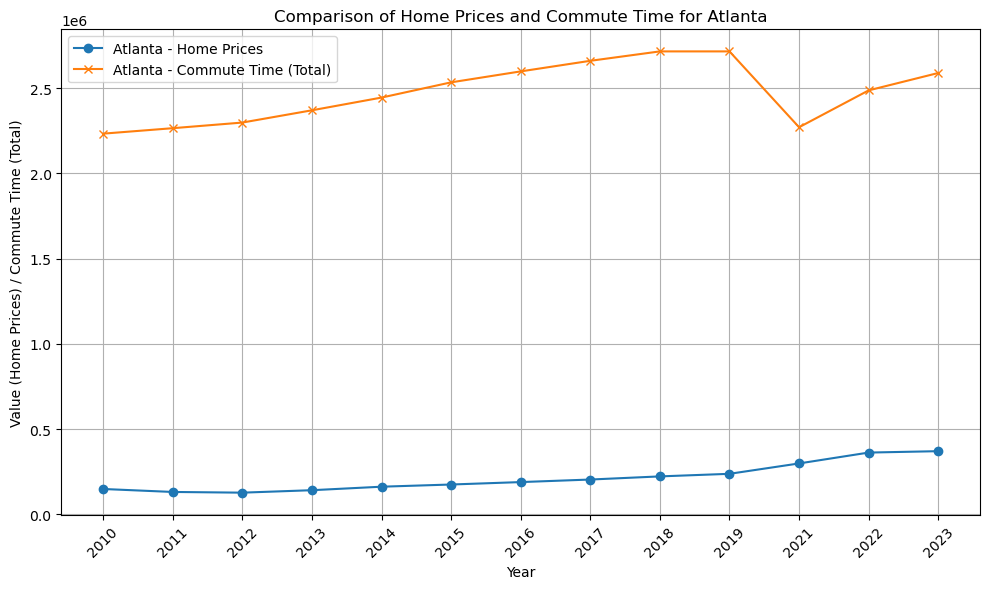

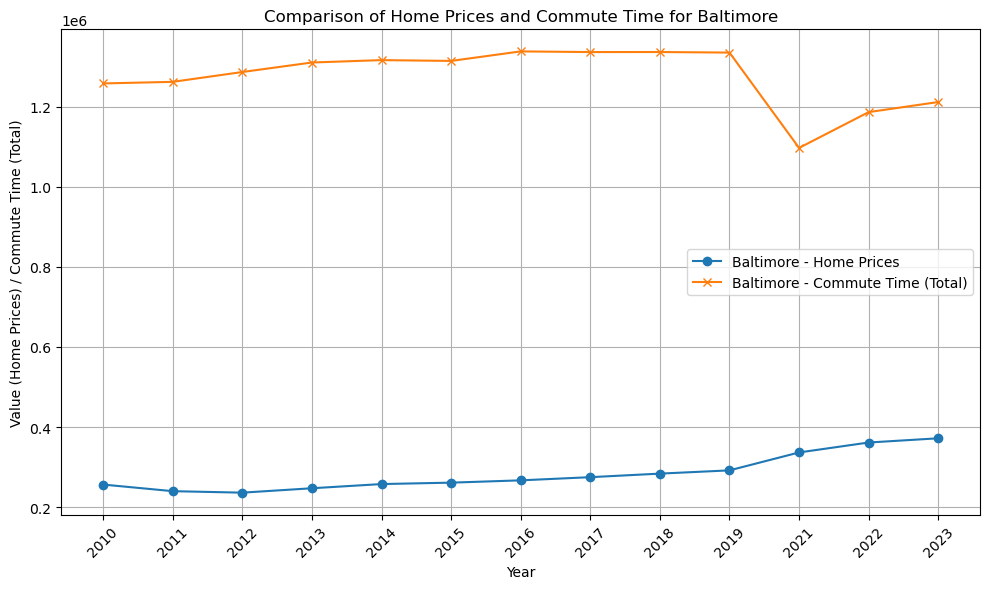

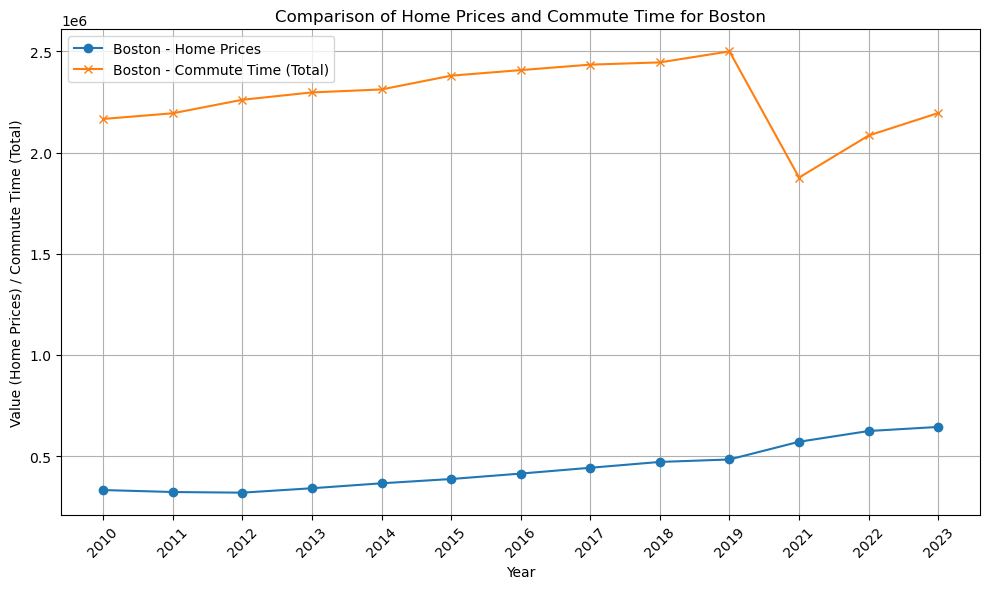

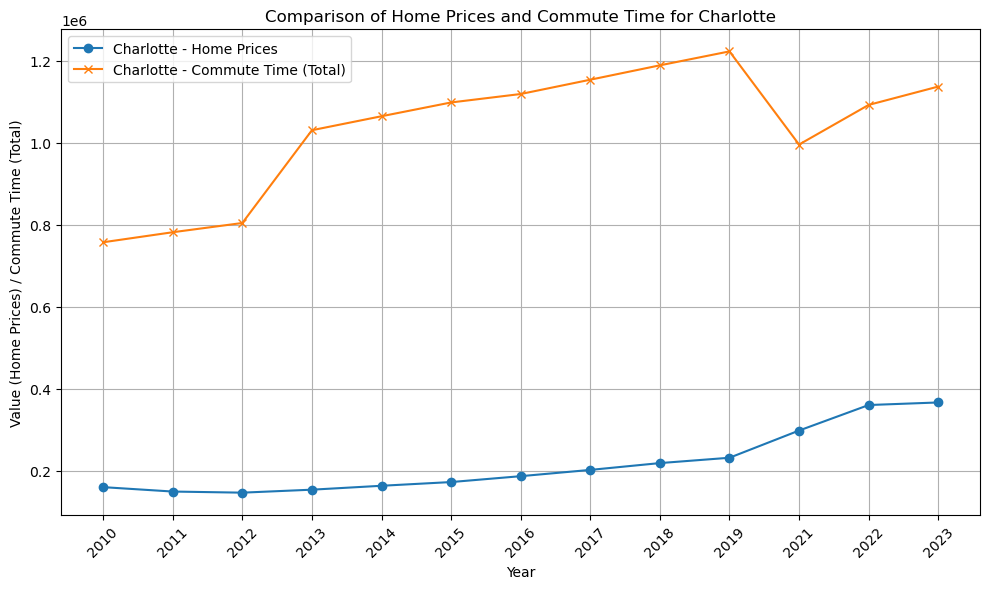

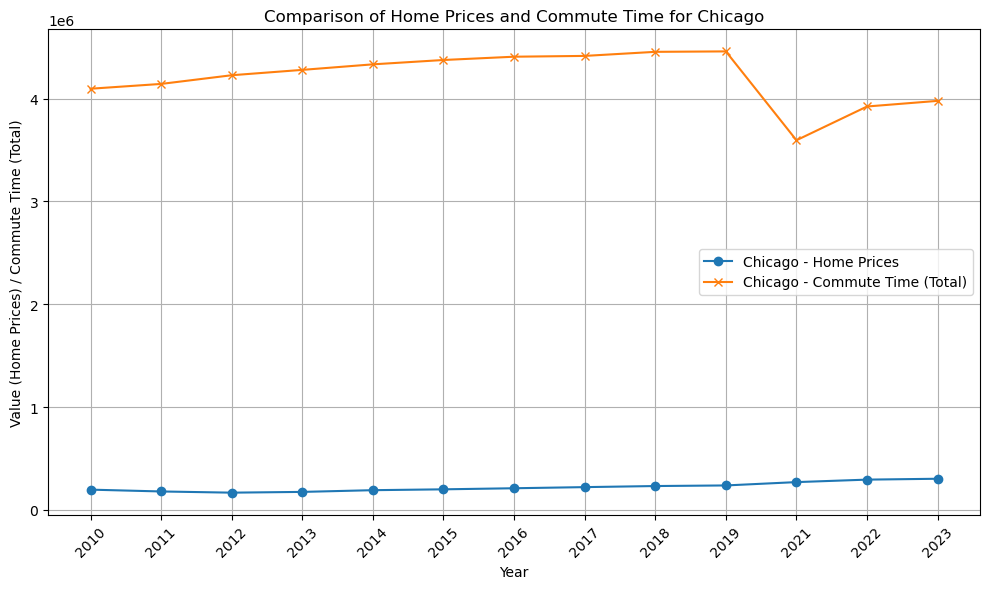

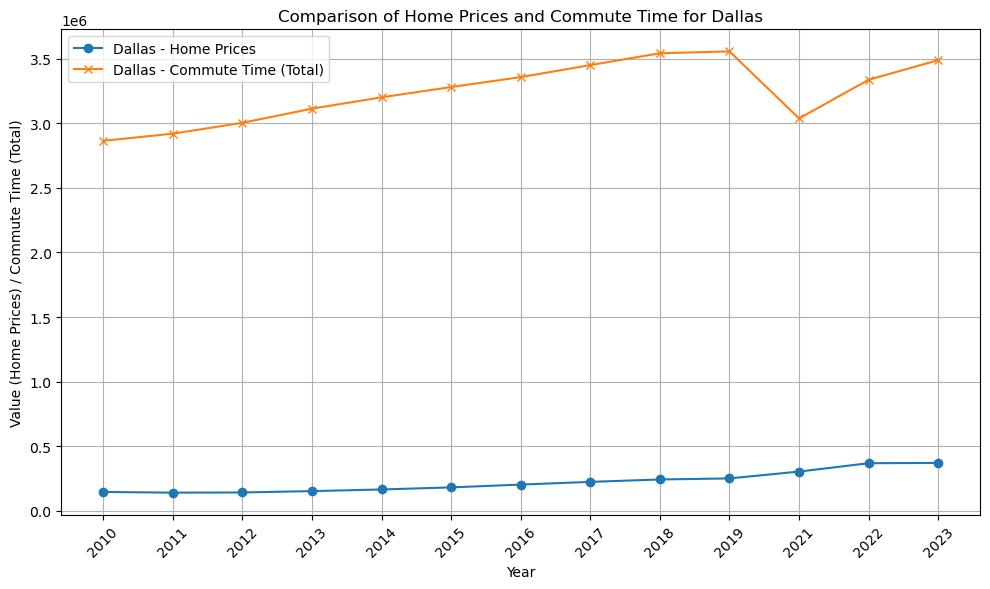

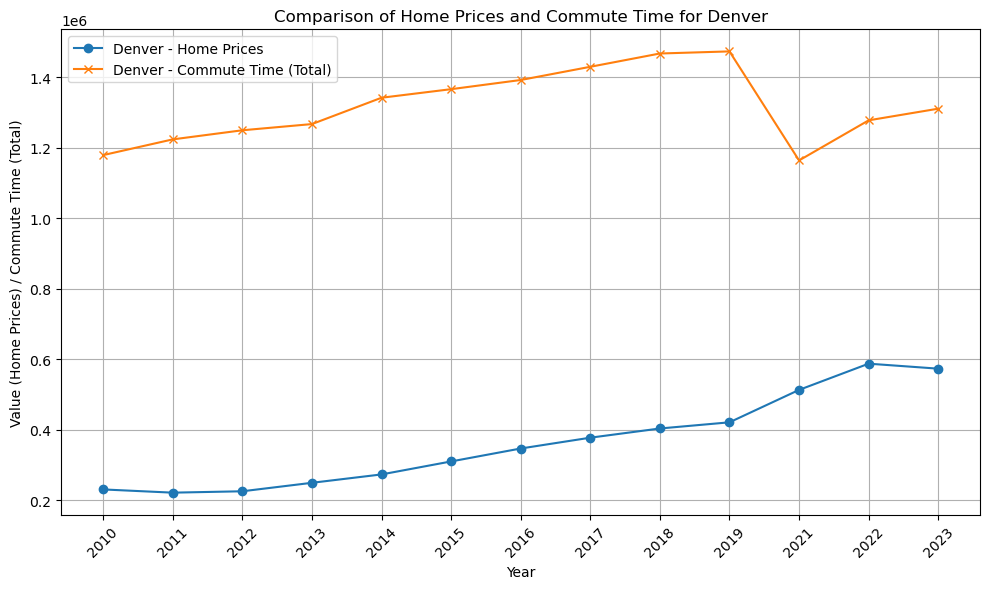

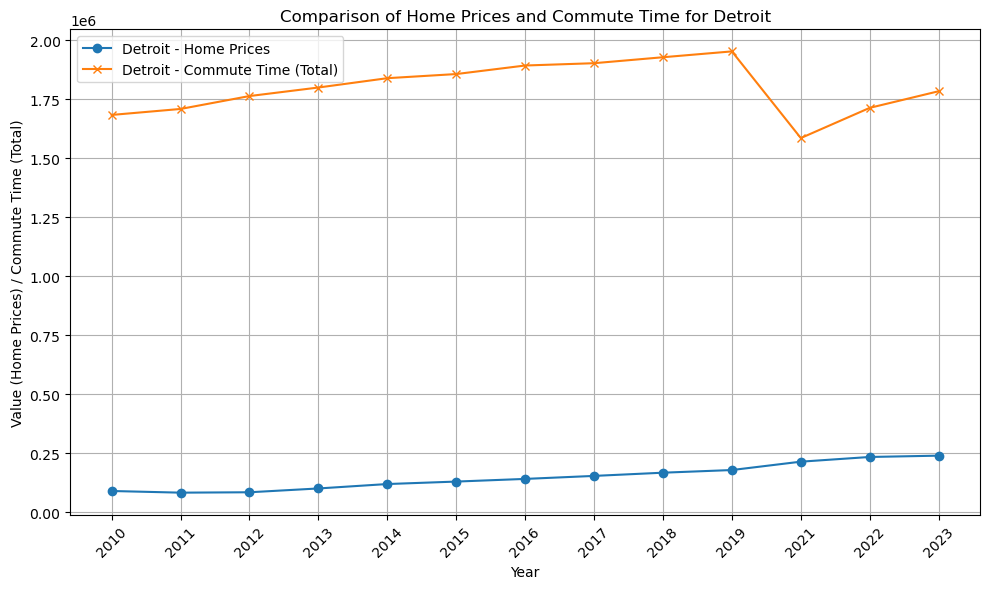

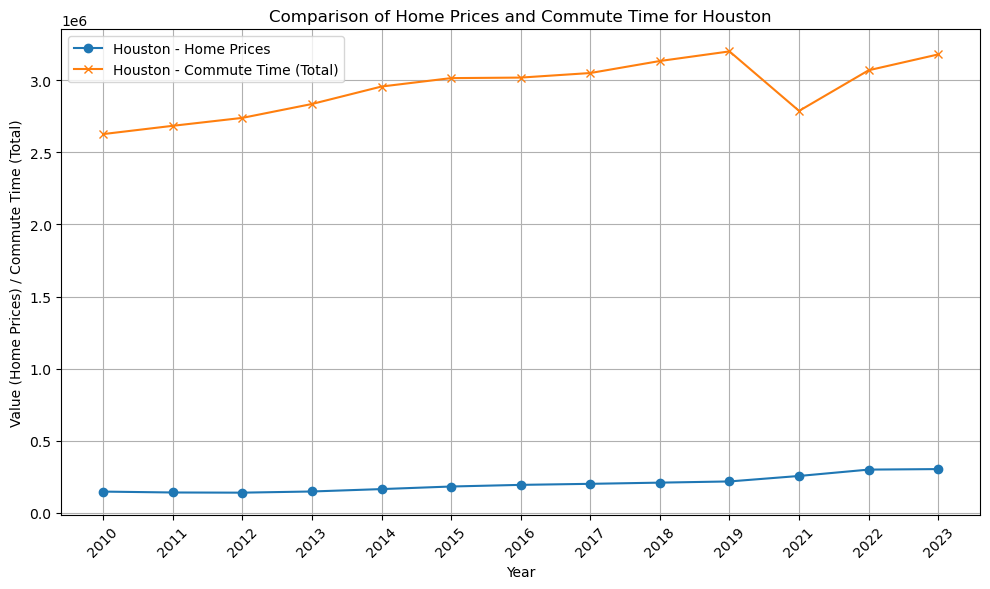

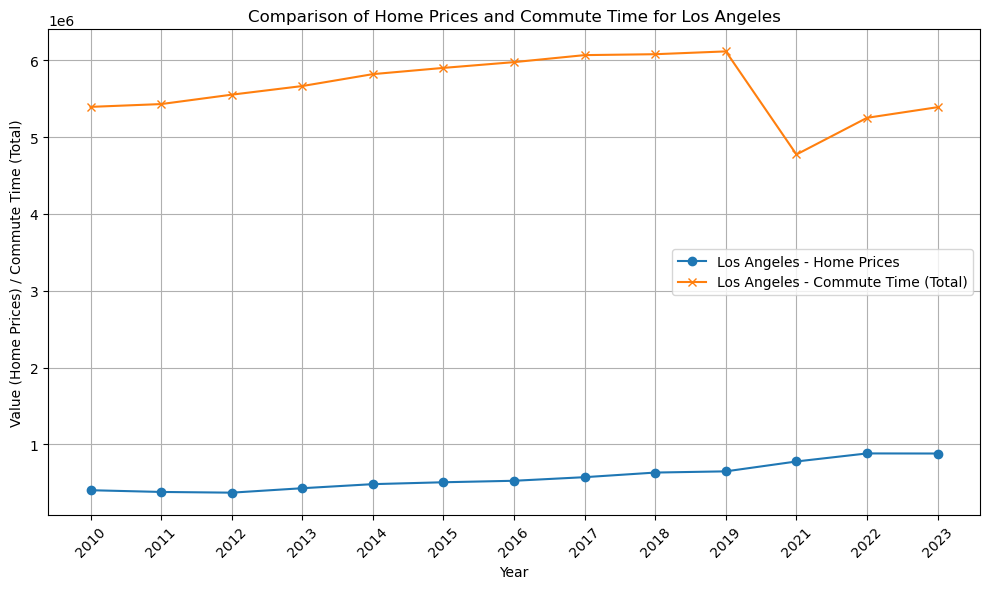

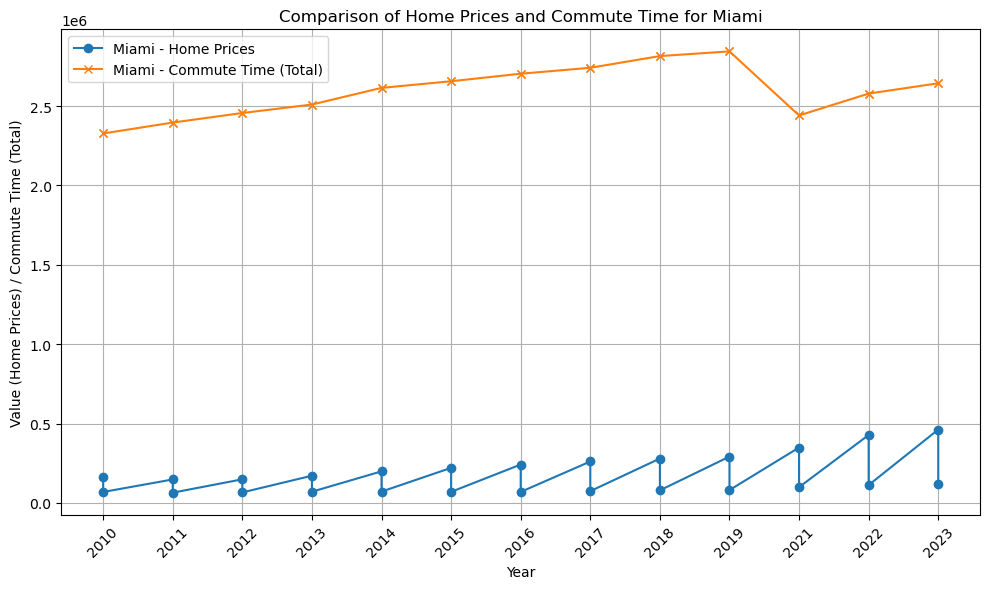

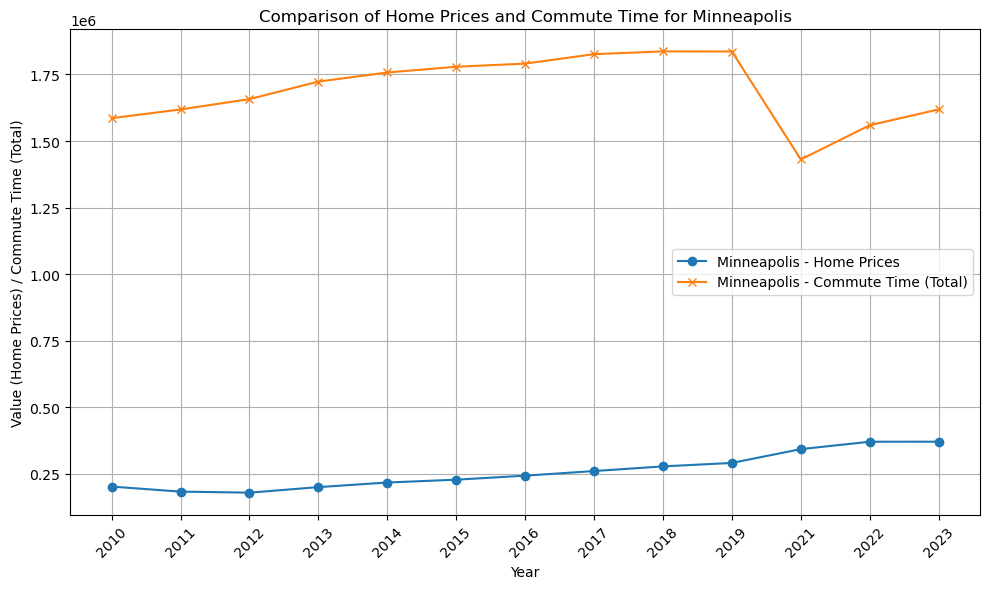

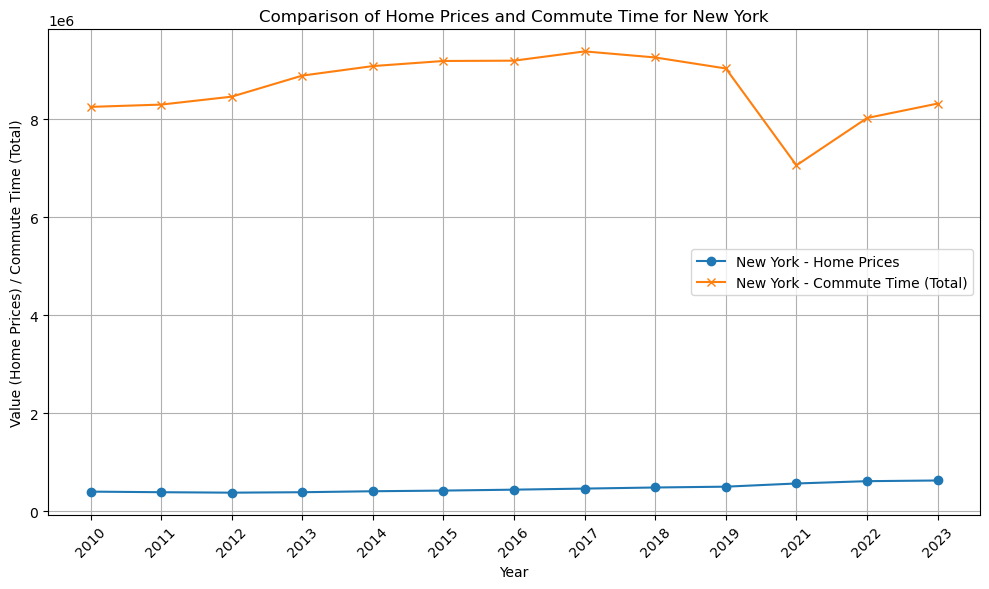

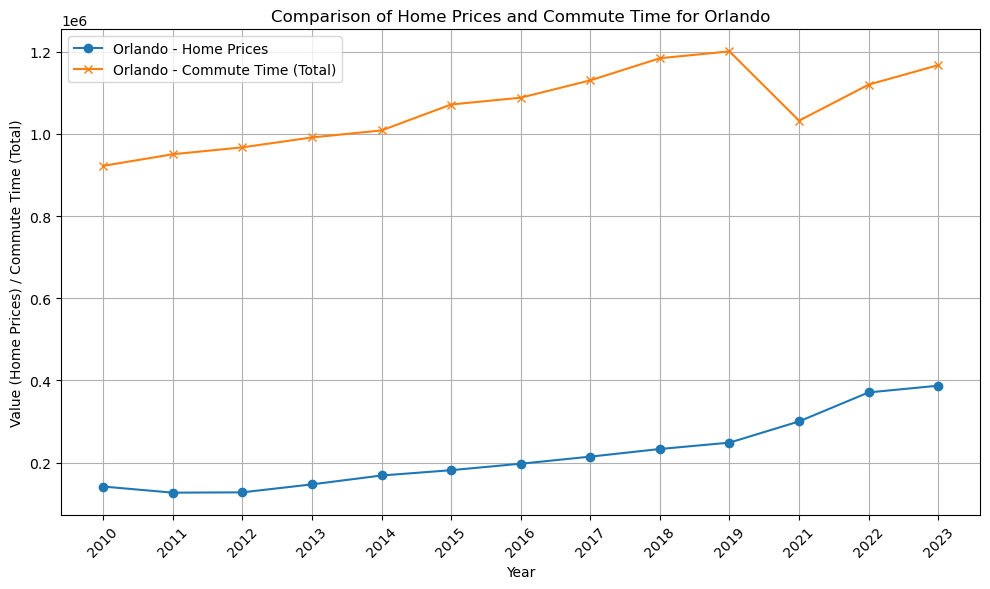

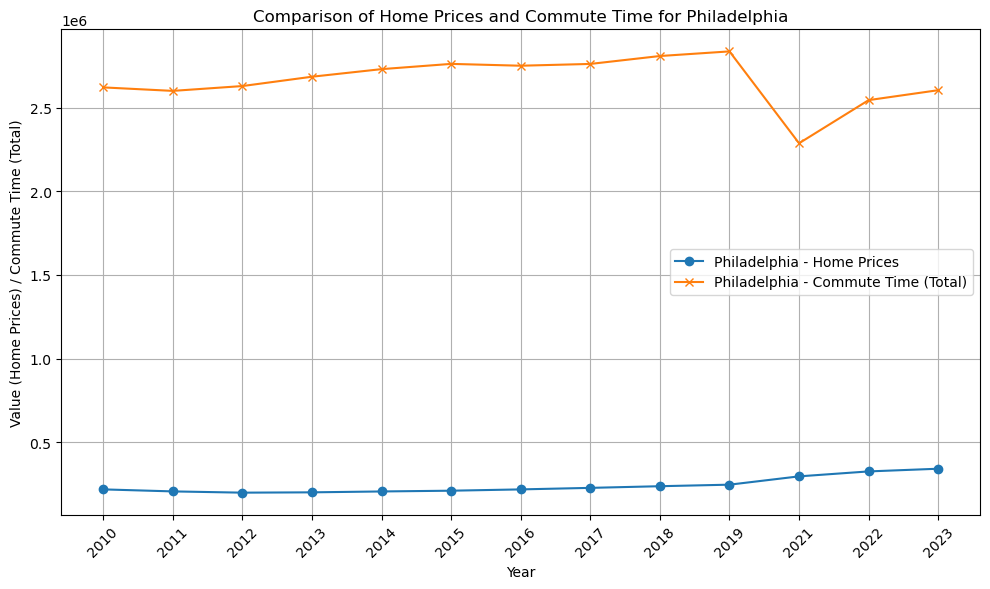

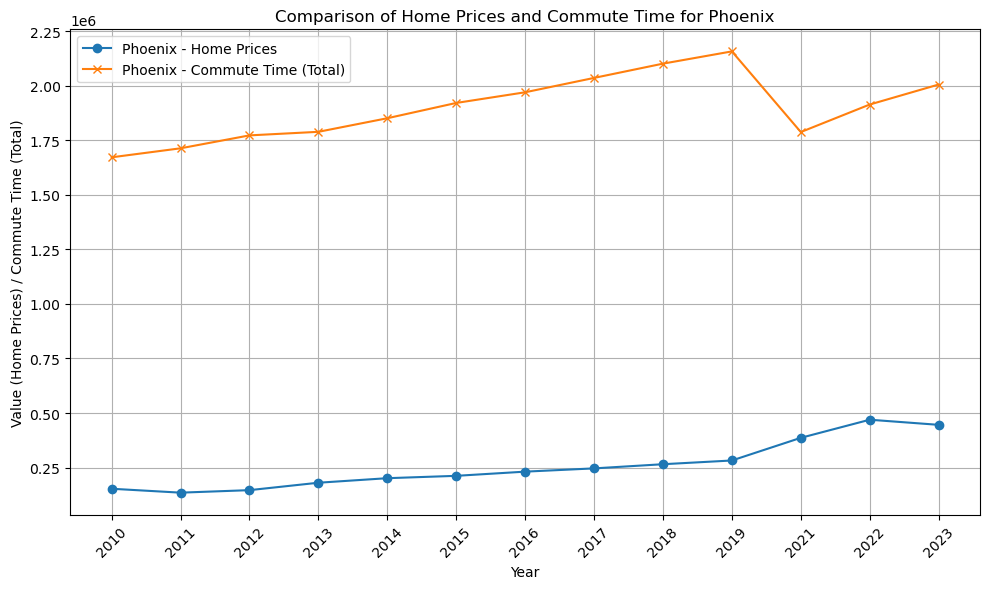

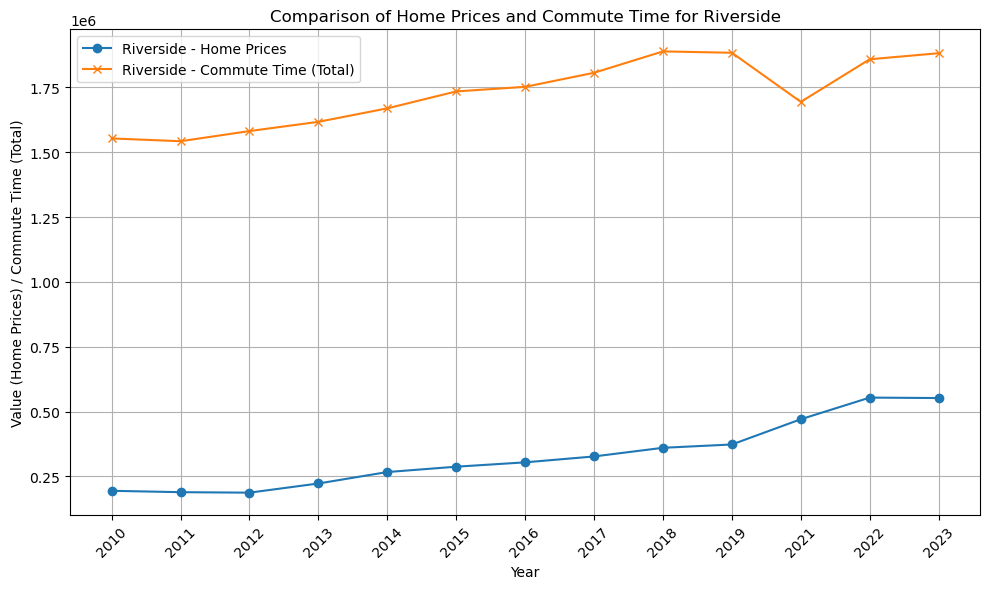

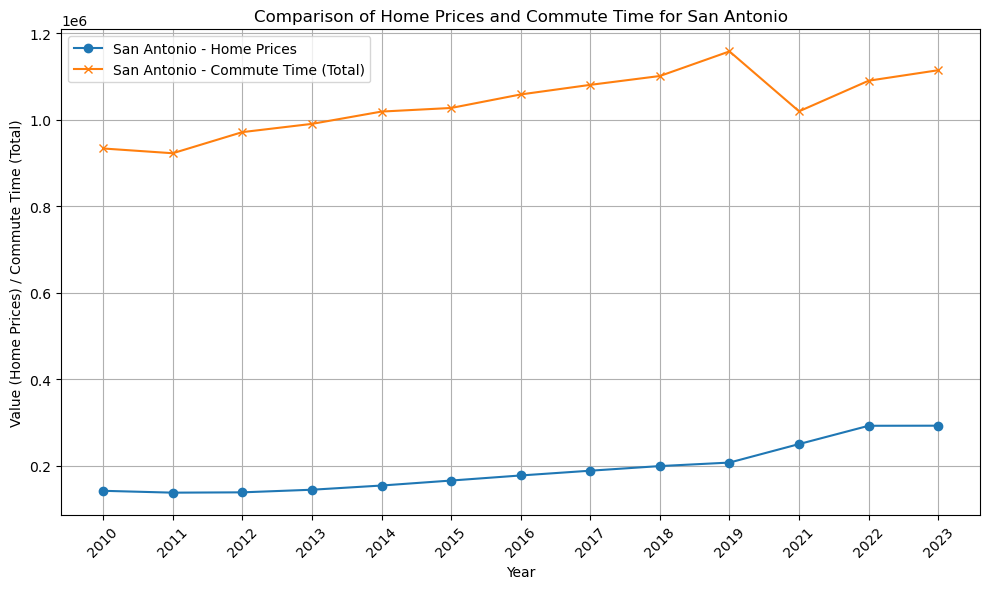

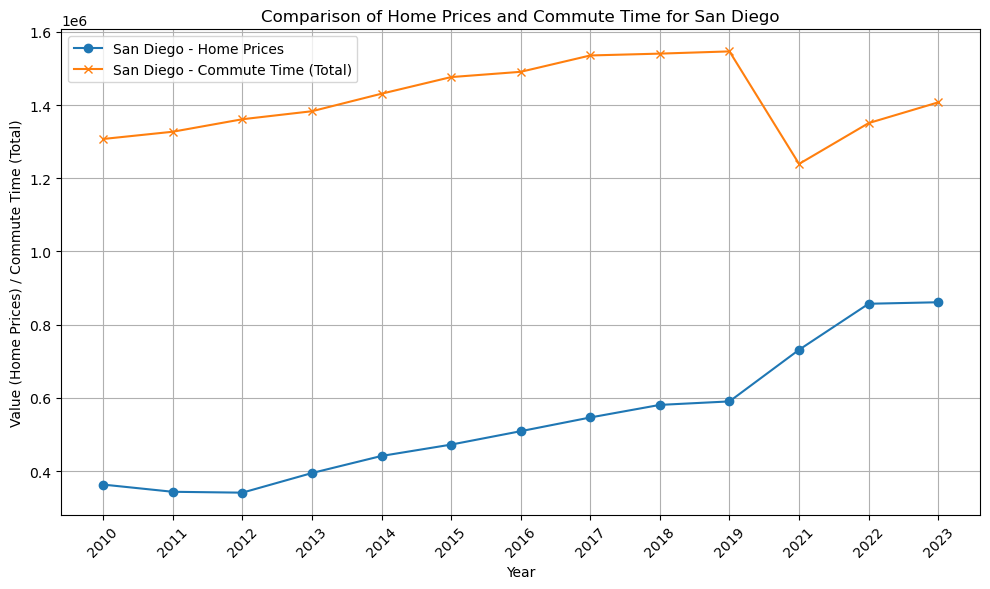

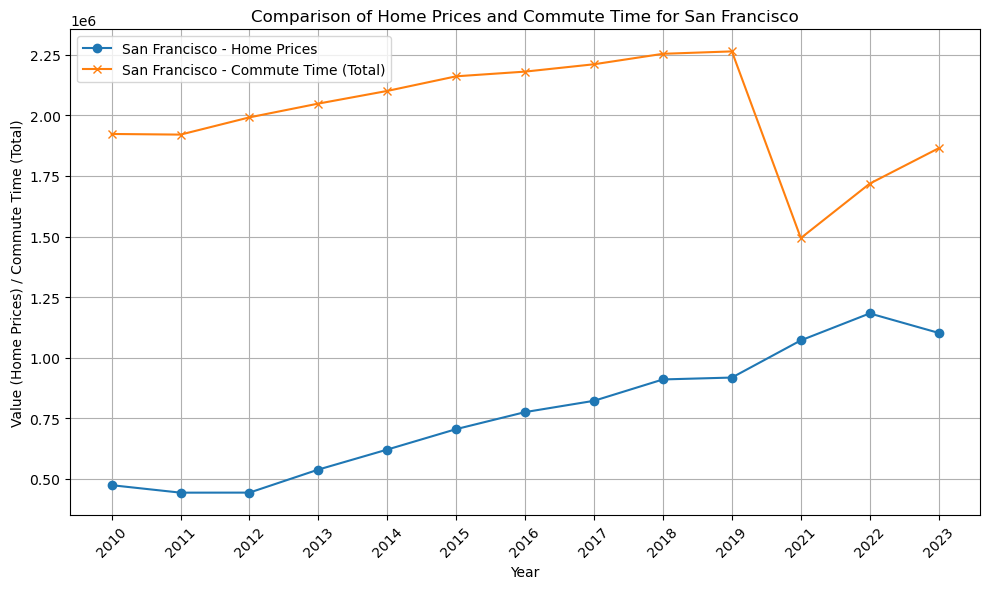

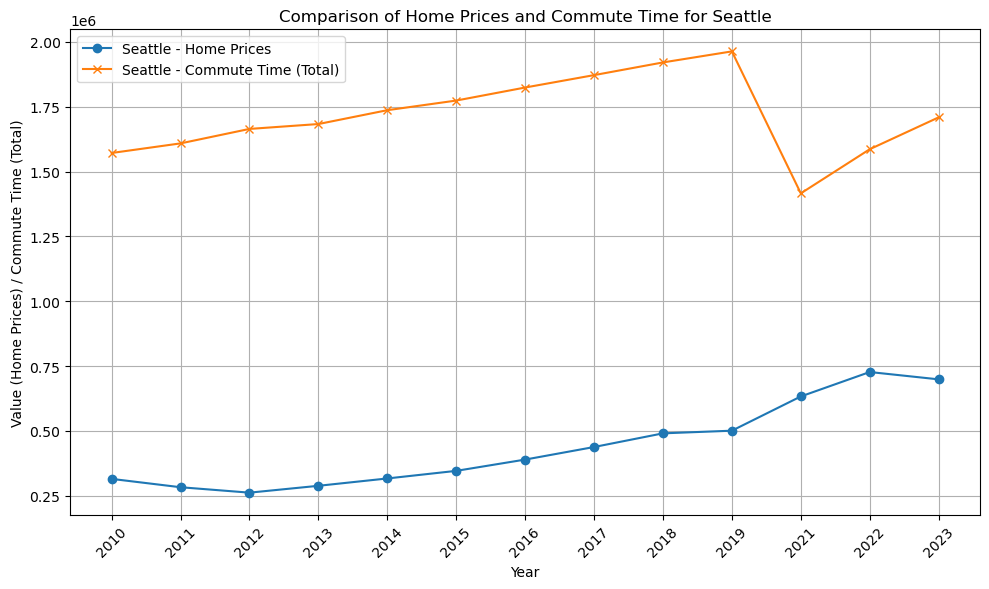

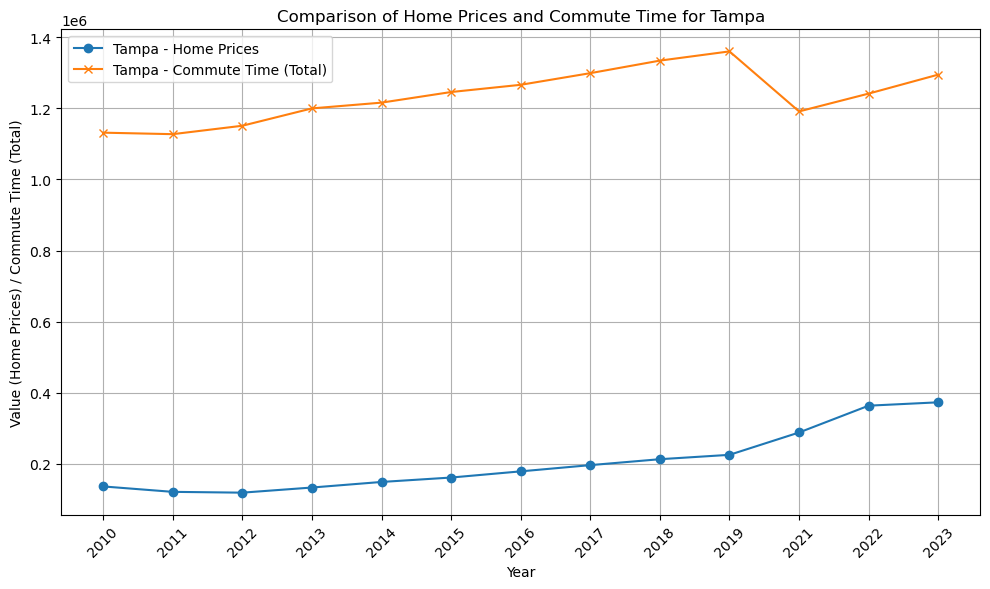

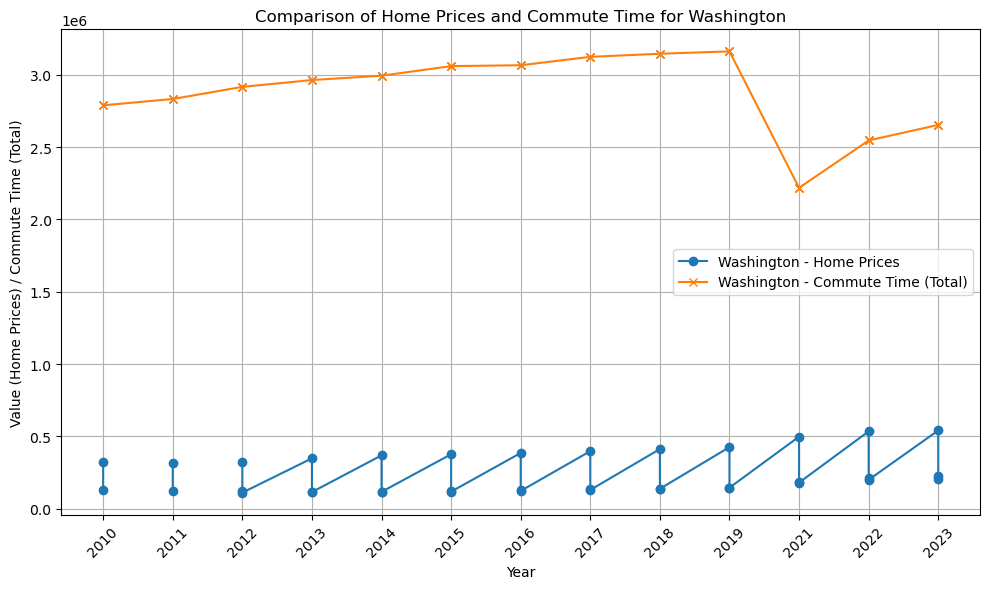

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the commute time data (assuming you've already done this)
commute_df = pd.read_csv("Commute_Time_By_Top_25_Metro_Area_All_Years__Three Buckets_Percentage.csv")

# Assuming 'Year' is already in the commute_df, otherwise convert if necessary
commute_df['Year'] = commute_df['Year'].astype(str)

# Merge the home prices data with the commute data on Metro City (from home prices) and Metro (from commute)
# and Year column in both DataFrames
merged_df = pd.merge(
    Home_Prices_Adjusted_df,        # Home prices data
    commute_df,                     # Commute time data
    left_on=['Metro City', 'Year'],  # Left keys for merging (home prices)
    right_on=['Metro', 'Year'],      # Right keys for merging (commute data)
    how='inner'                     # Perform inner join to keep matching rows only
)

# Loop through each unique metro city and create a separate plot for each city
for metro in merged_df['Metro City'].unique():
    city_data = merged_df[merged_df['Metro City'] == metro]
    
    plt.figure(figsize=(10, 6))
    
    # Plot Home Prices
    plt.plot(city_data['Year'], city_data['Value'], label=f'{metro} - Home Prices', marker='o')
    
    # Plot Commute Time (Total)
    plt.plot(city_data['Year'], city_data['Total'], label=f'{metro} - Commute Time (Total)', marker='x')
    
    # Customize each plot
    plt.title(f"Comparison of Home Prices and Commute Time for {metro}")
    plt.xlabel("Year")
    plt.ylabel("Value (Home Prices) / Commute Time (Total)")
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.grid(True)
    
    # Show the plot for this city
    plt.tight_layout()
    plt.show()
